# Senescence Predictor

Cellular senescence is a state of permanent cell cycle arrest that occurs in response to various cellular stresses, such as DNA damage, oxidative stress, and oncogene activation. It is a natural process that plays a role in aging and tissue repair. The following notebook is a convolutional nueral network made with PyTorch that predicts wheter or not a cell is senescent from mitochondrial images.

## Import and files paths

In [ ]:
import os
import random
import glob
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image
import seaborn as sns
import numpy as np
import torch
from torchvision.transforms import v2
from tqdm.auto import tqdm
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# import torchinfo

sd = 37
random.seed(sd)  # Set seed
FOL = "./my_data/nucs"

# Connect to GPU and run above.
print('STARTING:')

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
# Note: this notebook requires torch >= 1.10.0
print(f'Torch ver: {torch.__version__}\non Device: {device}')

#
!ls
!mkdir "./my_data"
!mkdir "./my_data/nucs"
!mkdir "./my_data/nucs/aged"
!mkdir "./my_data/nucs/young"
!mkdir "./my_data/test"
# !rm -rf /nucs/
# !rm -rf /nucs/aged
# !rm -rf /nucs/young

!ls
%cd ./my_data/nucs
!ls
%cd ../..
!ls

STARTING:
Torch ver: 2.1.0+cu121
on Device: cuda
drive  my_data	sample_data
mkdir: cannot create directory ‘./my_data’: File exists
mkdir: cannot create directory ‘./my_data/nucs’: File exists
mkdir: cannot create directory ‘./my_data/nucs/aged’: File exists
mkdir: cannot create directory ‘./my_data/nucs/young’: File exists
mkdir: cannot create directory ‘./my_data/test’: File exists
drive  my_data	sample_data
/content/my_data/nucs
aged  young
/content
drive  my_data	sample_data


## Import Google Drive folder

Nuclei images are scraped from a series of Original tif images


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')  # , force_remount=True).

# %cd /content/drive/My Drive/Images
!ls

image_path = "./drive/My Drive/Images"

def walk_through_dir(dir_path):
  total = 0
  for dirpath, dirnames, filenames in os.walk(dir_path):
    total = total + len(filenames)
    print(f"{len(dirnames)} directories and\t {len(filenames)}\timages in '{dirpath}'.")
  print(f"\t\tTOTAL:\t{total}\tIMAGES")

print(walk_through_dir(image_path))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
drive  my_data	sample_data
7 directories and	 25	images in './drive/My Drive/Images'.
0 directories and	 0	images in './drive/My Drive/Images/.ipynb_checkpoints'.
2 directories and	 0	images in './drive/My Drive/Images/nuclei'.
0 directories and	 0	images in './drive/My Drive/Images/nuclei/.ipynb_checkpoints'.
3 directories and	 0	images in './drive/My Drive/Images/nuclei/training_set'.
0 directories and	 0	images in './drive/My Drive/Images/nuclei/training_set/.ipynb_checkpoints'.
0 directories and	 82	images in './drive/My Drive/Images/nuclei/training_set/young'.
0 directories and	 80	images in './drive/My Drive/Images/nuclei/training_set/aged'.
1 directories and	 43	images in './drive/My Drive/Images/Test_set'.
3 directories and	 0	images in './drive/My Drive/Images/Test_set/test_set'.
0 directories and	 0	images in './drive/My Drive/Images/Test_set/test

Plot random images

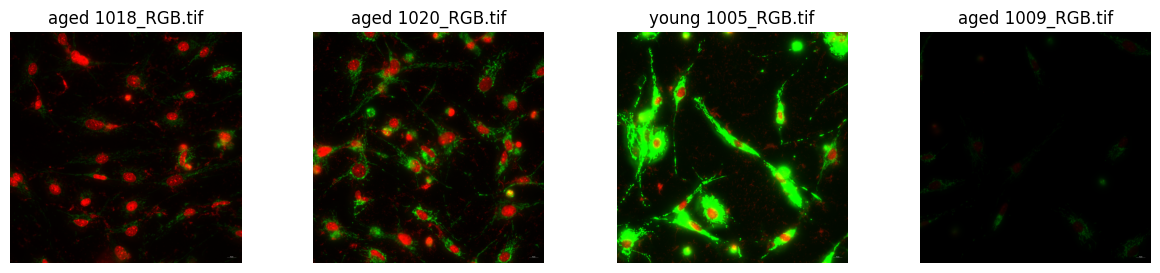

In [ ]:
image_list = glob.glob(f"{image_path}/originals/*/*.tif")  # Get all images

# create figure/
fig = plt.figure(figsize=(15, 3))
rows = 1
columns = 4

i = 1
while i <= columns:
  random_image = random.choice(image_list)  # Pick a random image
  image_class = Path(random_image).parent.stem
  img = cv2.imread(random_image)  # reading images

  # Adds a subplot at i position
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"{Path(random_image).parent.stem} {Path(random_image).name}")
  i = i+1

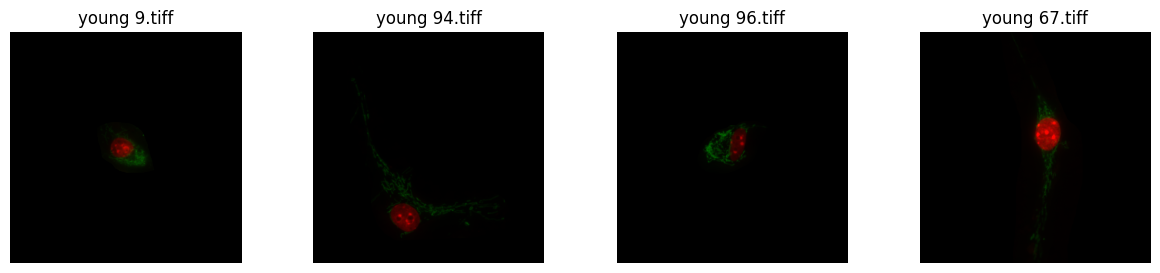

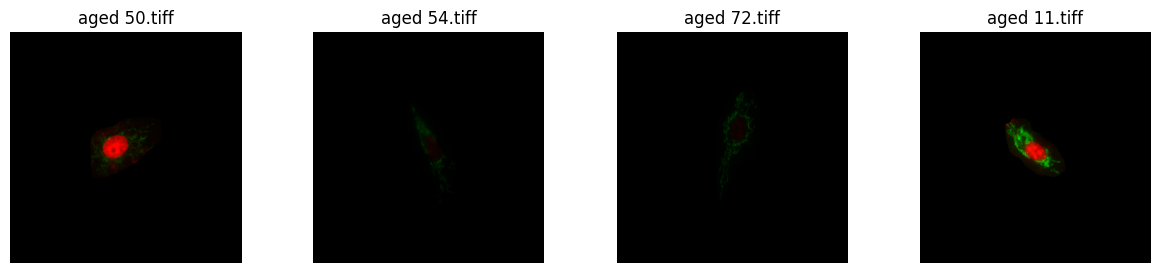

In [ ]:
random.seed(sd)  # Set seed
image_list = glob.glob(f"{image_path}/nuclei/*/young/*.tiff")
random_image = random.choice(image_list)  # Pick a random image

# create figure
fig = plt.figure(figsize=(15, 3))
rows = 1
columns = 4

i = 1
while i <= columns:
  random_image = random.choice(image_list)  # Pick a random image
  image_class = Path(random_image).parent.stem
  img = cv2.imread(random_image)  # reading images

  # Adds a subplot at i position
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"{Path(random_image).parent.stem} {Path(random_image).name}")
  i = i+1

image_list = glob.glob(f"{image_path}/nuclei/*/aged/*.tiff")
random_image = random.choice(image_list)  # Pick a random image

# create figure
fig = plt.figure(figsize=(15, 3))
rows = 1
columns = 4

i = 1
while i <= columns:
  random_image = random.choice(image_list)  # Pick a random image
  image_class = Path(random_image).parent.stem
  img = cv2.imread(random_image)  # reading images

  # Adds a subplot at i position
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"{Path(random_image).parent.stem} {Path(random_image).name}")
  i = i+1

## Training Data and Image Augmentation
Roate images at varying degrees

In [ ]:
def rotate_image(image):
  img = Image.open(image)
  fn = Path(image)
  # rotating an image
  amt = [0, 36, 72, 108, 144, 180, 216, 252, 288, 324]
  for rot in amt:
    imR = img.rotate(rot, Image.NEAREST, expand = 1)
    imR.save(FOL + "/" + fn.parent.name + "/" + fn.stem + "-"
             + str(rot) + ".jpg", "JPEG", quality=100)

In [ ]:
def normalize_image(img):
    # Convert the image to LAB color space


    return normalized_img

In [ ]:
image_list = glob.glob(f"{image_path}/nuclei/*/*/*.tiff")
# i = 0
for img in tqdm(image_list):
  #img = normalize_image()
  #print("Rotating img", img)
  rotate_image(img)

  # if i == 3: break
  # i = i + 1

!ls

  0%|          | 0/162 [00:00<?, ?it/s]

drive  my_data	sample_data


# Image Size

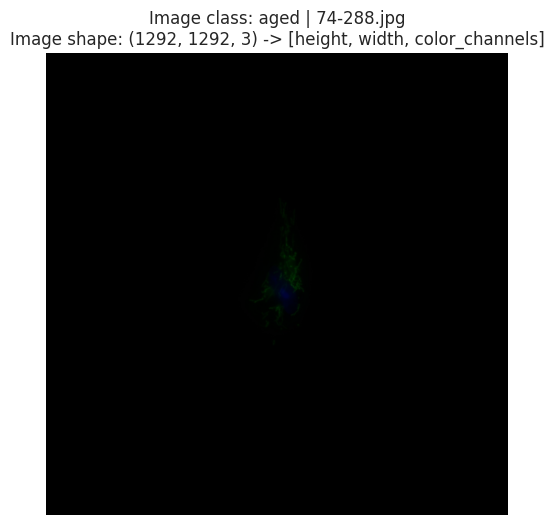

In [ ]:
random.seed(sd)  # Set seed
sns.set_theme()  # because this theme is pretty

image_list = glob.glob(FOL + "/*/*.jpg")
random_image = random.choice(image_list)  # Pick a random image
img = Image.open(random_image)
# Turn the image into an array
img_as_array = np.asarray(img)
# Plot the image with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {Path(random_image).parent.stem} | {Path(random_image).name}\nImage shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## Set up model.


Transform images for more effective training

In [ ]:
IMAGE_WIDTH = 256  # 128
IMAGE_HEIGHT = 256  # 128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
# Write transform for image
data_transform = v2.Compose([
        # Brighten and Sharpen:
        v2.ColorJitter(brightness=[1.2, 1.4],
            contrast=[1.3, 1.5], saturation=[1.1, 1.3], hue=0),
        # Resize the images to IMAGE_SIZE xIMAGE_SIZE
        v2.Resize(size=IMAGE_SIZE),
        # Flip the images randomly on the horizontal
        v2.RandomHorizontalFlip(p=0.5), # p = probability of flip
        # Turn the image into a torch.Tensor
        v2.RandomVerticalFlip(p=0.5), # p = probability of flip
        # Turn the image into a torch.Tensor
        v2.ToTensor() # this also converts all pixel values
                            # from 0 to 255 to be between 0.0 and 1.0
])
print(data_transform)

Compose(
      ColorJitter(brightness=(1.2, 1.4), contrast=(1.3, 1.5), saturation=(1.1, 1.3))
      Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=warn)
      RandomHorizontalFlip(p=0.5)
      RandomVerticalFlip(p=0.5)
      ToTensor()
)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Show the transformations

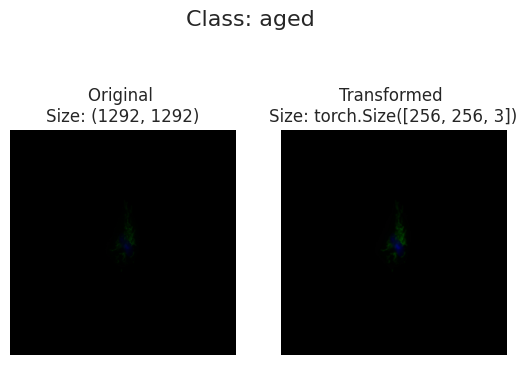

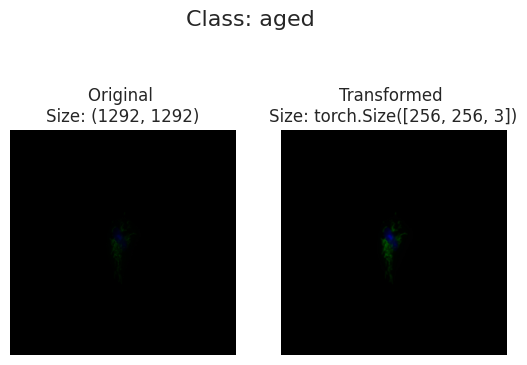

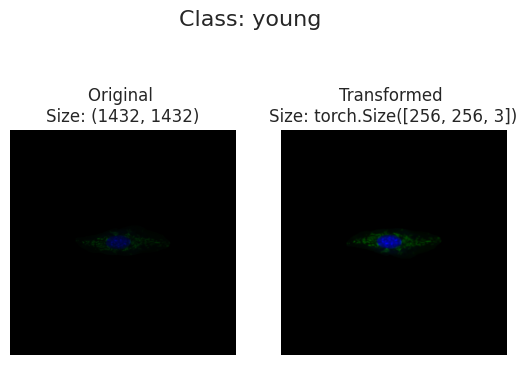

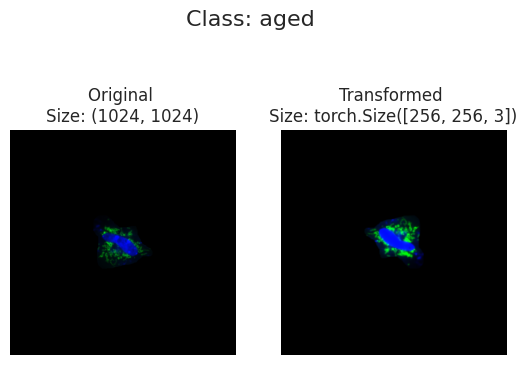

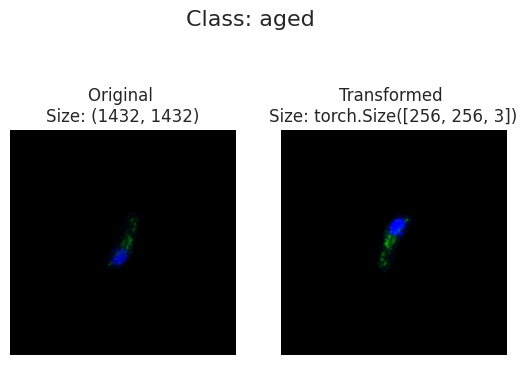

In [ ]:
def plot_transformed_images(image_paths, transform, n=5, seed=42):
  random.seed(sd)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # Note: permute() will change shape of image to suit matplotlib
      # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
      ax[1].axis("off")
      fig.suptitle(f"Class: {Path(image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_list, transform=data_transform, n=5)

Set up the full training set and the test image set

In [ ]:
train_dir = FOL
test_dir = f'{image_path}/Test_set/'

print(f"Train data: {train_dir}\nTest data: {test_dir}\n")

# Creating training set
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
    transform=data_transform, # transforms to perform on data (images)
    target_transform=None) # transforms to perform on labels (if necessary)
# Creating test set
test_data = datasets.ImageFolder(root=test_dir,
    transform=data_transform)

print(f"Train data:\t{train_data}\n\nTest data:\t{test_data}")

Train data: ./my_data/nucs
Test data: ./drive/My Drive/Images/Test_set/

Train data:	Dataset ImageFolder
    Number of datapoints: 1620
    Root location: ./my_data/nucs
    StandardTransform
Transform: Compose(
                 ColorJitter(brightness=(1.2, 1.4), contrast=(1.3, 1.5), saturation=(1.1, 1.3))
                 Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 RandomVerticalFlip(p=0.5)
                 ToTensor()
           )

Test data:	Dataset ImageFolder
    Number of datapoints: 15
    Root location: ./drive/My Drive/Images/Test_set/
    StandardTransform
Transform: Compose(
                 ColorJitter(brightness=(1.2, 1.4), contrast=(1.3, 1.5), saturation=(1.1, 1.3))
                 Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 RandomVerticalFlip(p=0.5)
                 ToTensor

In [ ]:
# Get class names as a list
class_names = train_data.classes
print("Class names:", class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict:", class_dict)

# Check the lengths
print(f"Training set images: {len(train_data)}\nTest set images: {len(test_data)}\n")

img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: {img}\n")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Class names: ['aged', 'young']
Class names as a dict: {'aged': 0, 'young': 1}
Training set images: 1620
Test set images: 15

Image tensor: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Image shape: torch.Size([3, 256, 256])
Image datatype: torch.float32
Image

Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


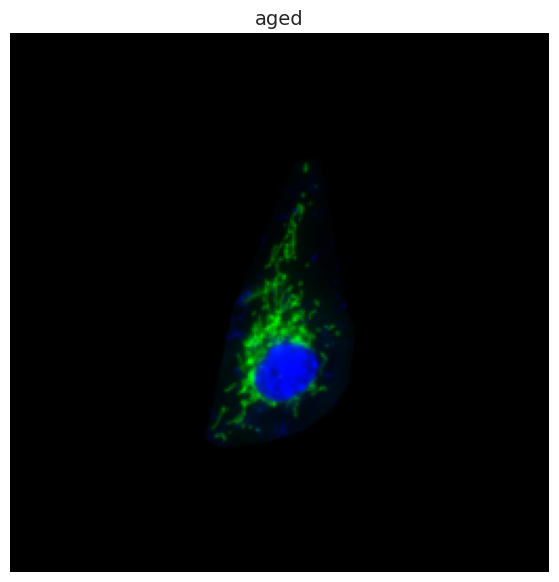

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(f"{class_names[label]}", fontsize=14);

In [ ]:
# How many subprocesses will be used for data loading (higher = more)
NUM_WORKERS = os.cpu_count()

# Turn train and test Datasets into DataLoaders
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=NUM_WORKERS,
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=NUM_WORKERS,
                             shuffle=True) # don't usually need to shuffle testing data

train_dataloader, test_dataloader, NUM_WORKERS

(<torch.utils.data.dataloader.DataLoader at 0x79850e92b5e0>,
 2)

In [ ]:
img, label = next(iter(train_dataloader))

# Note that batch size will now be 1.
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 256, 256]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [ ]:
# Set image size.
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Create training transform with TrivialAugment
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])

# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_augmented

(Dataset ImageFolder
     Number of datapoints: 1620
     Root location: ./my_data/nucs
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 15
     Root location: ./drive/My Drive/Images/Test_set/
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
# Se parameters.
BATCH_SIZE = 32
torch.manual_seed(sd)

train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented, NUM_WORKERS

(<torch.utils.data.dataloader.DataLoader at 0x79850ee2d450>,
 2)

In [ ]:
# Create CNN.
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))
    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
# Instantiate an object.
model = ImageClassifier().to(device)
model

ImageClassifier(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear

Try it out on an image:

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0139, -0.0122]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4996, 0.5004]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


Understanding the model

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
# do a test pass through of an example input size
summary(model, input_size=[1, 3, IMAGE_WIDTH ,IMAGE_HEIGHT])

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifier                          [1, 2]                    --
├─Sequential: 1-1                        [1, 64, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─BatchNorm2d: 2-3                  [1, 64, 224, 224]         128
│    └─MaxPool2d: 2-4                    [1, 64, 112, 112]         --
├─Sequential: 1-2                        [1, 512, 56, 56]          --
│    └─Conv2d: 2-5                       [1, 512, 112, 112]        295,424
│    └─ReLU: 2-6                         [1, 512, 112, 112]        --
│    └─BatchNorm2d: 2-7                  [1, 512, 112, 112]        1,024
│    └─MaxPool2d: 2-8                    [1, 512, 56, 56]          --
├─Sequential: 1-3                        [1, 512, 28, 28]          --
│    └─Conv2d: 2-9                       [1, 512, 56, 56]          2,359,

Define training loop

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

Load previouly trained model

In [ ]:
model = torch.load(image_path + '/senmodel-posttrain-300124-48')

In [ ]:
# Set random seeds
torch.manual_seed(sd)
torch.cuda.manual_seed(sd)

# Set number of epochs
NUM_EPOCHS = 25

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

torch.save(model, image_path + '/senmodel-pretrain')

# Train model_0
model_results = train(model=model,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_augmented,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

torch.save(model, image_path + '/senmodel-posttrain')

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0620 | train_acc: 0.6039 | test_loss: 4.6961 | test_acc: 0.0000
Epoch: 2 | train_loss: 0.8752 | train_acc: 0.7393 | test_loss: 5.8038 | test_acc: 0.0000
Epoch: 3 | train_loss: 0.5516 | train_acc: 0.8120 | test_loss: 0.7951 | test_acc: 0.5714
Epoch: 4 | train_loss: 0.5744 | train_acc: 0.8169 | test_loss: 5.4183 | test_acc: 0.0357
Epoch: 5 | train_loss: 0.4908 | train_acc: 0.8523 | test_loss: 0.0037 | test_acc: 1.0000
Epoch: 6 | train_loss: 0.4807 | train_acc: 0.8665 | test_loss: 0.0046 | test_acc: 1.0000
Epoch: 7 | train_loss: 0.3632 | train_acc: 0.8787 | test_loss: 0.0548 | test_acc: 1.0000
Epoch: 8 | train_loss: 0.4656 | train_acc: 0.8800 | test_loss: 0.9097 | test_acc: 0.5357
Epoch: 9 | train_loss: 0.3831 | train_acc: 0.8914 | test_loss: 0.5193 | test_acc: 0.6786
Epoch: 10 | train_loss: 0.3419 | train_acc: 0.8863 | test_loss: 0.0000 | test_acc: 1.0000
Epoch: 11 | train_loss: 0.5684 | train_acc: 0.8925 | test_loss: 2.3573 | test_acc: 0.0714
Epoch: 12 | train_l

In [ ]:
#print(f"{(end_time-start_time)/3600:.2f} hrs")
model

ImageClassifier(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear

Visualize loss and accuracy:

In [ ]:
# visualize the loss and accuracy values
def plot_loss_curves(results):

    results = dict(list(model_results.items()))

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(model_results)

NameError: name 'model_results' is not defined

# Make a Prediction

Test image path: ./drive/My Drive/Images/Test_set/test_set/young/98.tiff
Image class: young
Image height: 1024
Image width: 1024


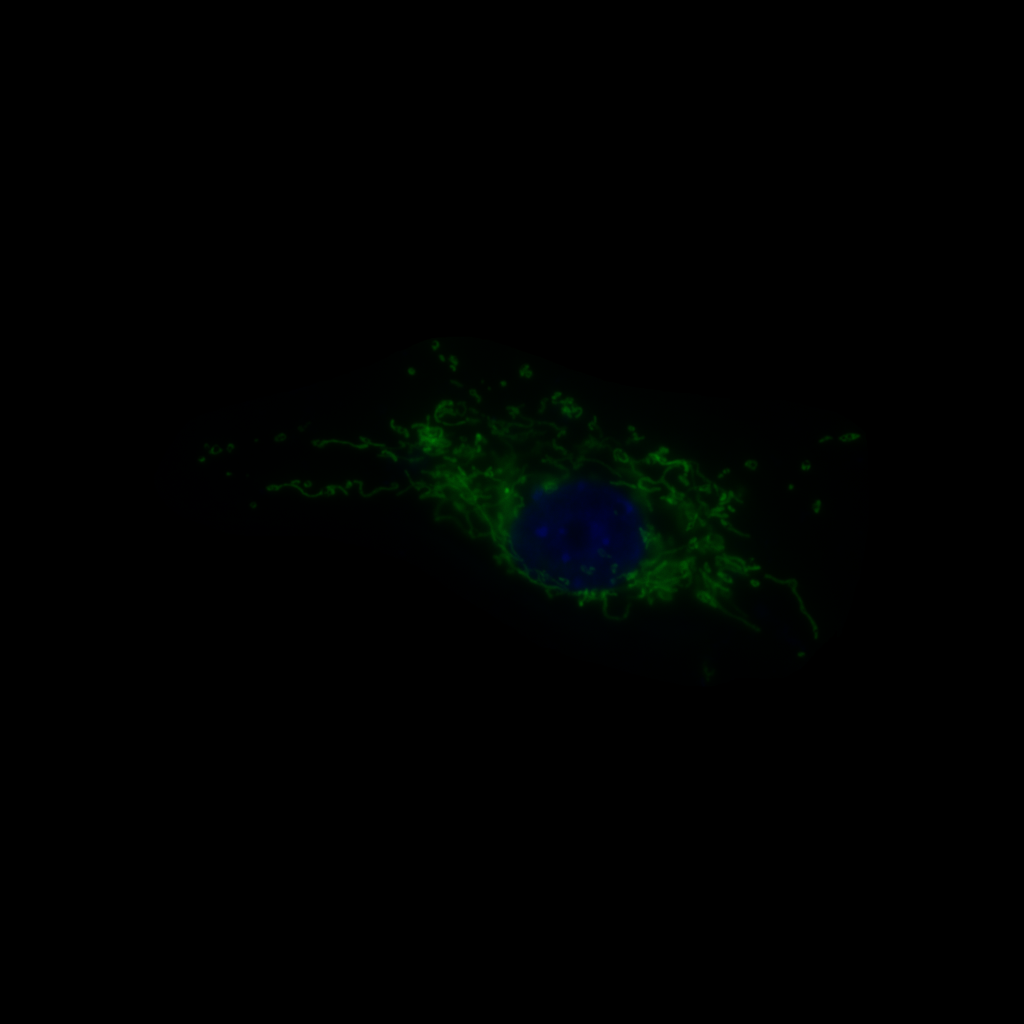

In [ ]:
# Make a prediction

# Set seed
random.seed()

# Choose a test image.
# 1. Get all image paths (* means "any combination")
image_path_list= glob.glob(f"{image_path}/Test_set/*/*/*.tiff")

# 2a. Get random image path
test_image_path = random.choice(image_path_list)
# 2b. Get specific image path
#test_image_path = image_path + "/nuclei/test_set/aged/66.tiff"

# 3. Get image class from path name (the image class is the name
# of the directory where the image is stored)
image_class = Path(test_image_path).parent.stem

# 4. Open image
img = Image.open(test_image_path)

# 5. Print metadata
print(f"Test image path: {test_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
import torchvision

test_jpg = "./my_data/test"

outfile = test_jpg + "/" + Path(test_image_path).stem + "-" + Path(test_image_path).parent.stem + '.jpg'
img.save(outfile, "JPEG", quality=100)

img = Image.open(outfile)
img.filename

'./my_data/test/98-young.jpg'

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(img.filename).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Custom image shape: torch.Size([3, 1024, 1024])

Custom image dtype: torch.float32


In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1024, 1024])
New shape: torch.Size([3, 224, 224])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 224, 224])
Unsqueezed custom image shape: torch.Size([1, 3, 224, 224])


In [ ]:
custom_image_pred

tensor([[-1.0517,  0.7681]], device='cuda:0')

In [ ]:
# Let's convert them from logits -> prediction probabilities -> prediction labels
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-1.0517,  0.7681]], device='cuda:0')
Prediction probabilities: tensor([[0.1395, 0.8605]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


In [ ]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'young'

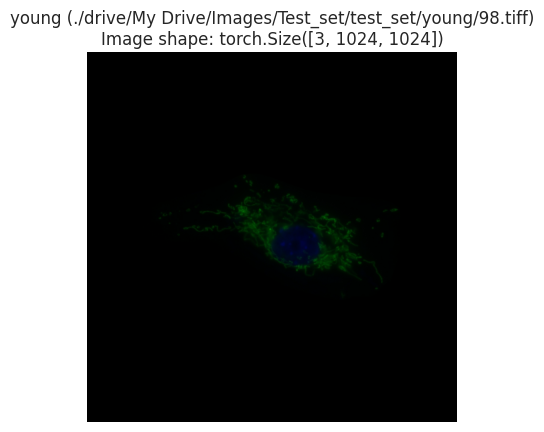

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"{custom_image_pred_class} ({test_image_path})\nImage shape: {custom_image.shape}")
plt.axis(False);

# Test all Test Images:

In [ ]:
# Get all image paths (* means "any combination")
image_path_list= glob.glob(f"{image_path}/Test_set/test_set/*/*.tiff")

numImages = 0
numCorrect = 0
numWrong = 0
score= []

# Get each image
for test_image in image_path_list:
    # Get image class from path name
    image_class = Path(test_image).parent.stem
    # Open image
    img = Image.open(test_image)
    # Print metadata
    #print(f"Test image: {test_image}")

    outfile = test_jpg + "/" + Path(test_image).stem + "-" + Path(test_image).parent.stem + '.jpg'
    img.save(outfile, "JPEG", quality=100)

    imT = Image.open(outfile)
    #print(imT.filename)

    # Load in custom image and convert the tensor values to float32
    custom_image = torchvision.io.read_image(imT.filename).type(torch.float32)

    # Divide the image pixel values by 255 to get them between [0, 1]
    custom_image = custom_image / 255.

    # Print out image data
    # print(f"Custom image tensor:\n{custom_image}\n")
    # print(f"Custom image shape: {custom_image.shape}\n")
    # print(f"Custom image dtype: {custom_image.dtype}")

    custom_image_transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
    ])

    # Transform target image
    custom_image_transformed = custom_image_transform(custom_image)

    # Print out original shape and new shape
    # print(f"Original shape: {custom_image.shape}")
    # print(f"New shape: {custom_image_transformed.shape}")

    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to image
        custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

        # Print out different shapes
        # print(f"Custom image transformed shape: {custom_image_transformed.shape}")
        # print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

        # Make a prediction on image with an extra dimension
        custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))
    #print(imT.filename, custom_image_pred)

    # Let's convert them from logits -> prediction probabilities -> prediction labels
    # Print out prediction logits
    #print(f"Prediction logits: {custom_image_pred}")

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
    #print(f"Prediction probabilities: {custom_image_pred_probs}")

    # Convert prediction probabilities -> prediction labels
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
    #print(f"Prediction label: {custom_image_pred_label}")

    custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
    print(Path(imT.filename).name, image_class, custom_image_pred_class)
    print(custom_image_pred_probs)
    score.append(custom_image_pred_probs[0,1].item())

    # Plot custom image
    # plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
    # plt.title(f"{custom_image_pred_class} ({test_image_path})\nImage shape: {custom_image.shape}")
    # plt.axis(False);

    numImages = numImages + 1

    if image_class == custom_image_pred_class:
        numCorrect = numCorrect + 1
    else:
        numWrong = numWrong + 1

    if numImages == 10 : continue  # break
# imT
print(f"\nNumber Images: {numImages} Correct: {numCorrect} Wrong: {numWrong}")
print(f"\nOverall Score: {sum(score) / len(score)}")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


97-young.jpg young young
tensor([[0.1006, 0.8994]], device='cuda:0')
98-young.jpg young young
tensor([[0.1395, 0.8605]], device='cuda:0')
99-young.jpg young young
tensor([[0.1925, 0.8075]], device='cuda:0')
100-young.jpg young young
tensor([[0.1267, 0.8733]], device='cuda:0')
101-young.jpg young young
tensor([[0.2351, 0.7649]], device='cuda:0')
102-young.jpg young young
tensor([[0.0772, 0.9228]], device='cuda:0')
103-young.jpg young young
tensor([[0.0660, 0.9340]], device='cuda:0')
104-young.jpg young young
tensor([[0.0987, 0.9013]], device='cuda:0')
105-young.jpg young young
tensor([[0.1042, 0.8958]], device='cuda:0')
106-young.jpg young aged
tensor([[0.6368, 0.3632]], device='cuda:0')
107-young.jpg young young
tensor([[0.0376, 0.9624]], device='cuda:0')
108-young.jpg young young
tensor([[0.2930, 0.7070]], device='cuda:0')
109-young.jpg young young
tensor([[0.1970, 0.8030]], device='cuda:0')
110-young.jpg young young
tensor([[0.1567, 0.8433]], device='cuda:0')
111-young.jpg young youn

In [ ]:
for test_image in image_path_list:
    # Get image class from path name
    image_class = Path(test_image).parent.stem
    # Open image
    img = Image.open(test_image)

    outfile = f'{test_dir}/{Path(test_image).stem}-{Path(test_image).parent.stem}.jpg'
    img.save(outfile, "JPEG", quality=100)
    imT = Image.open(outfile)
    # Load in custom image and convert the tensor values to float32
    custom_image = torchvision.io.read_image(imT.filename).type(torch.float32)
    # Divide the image pixel values by 255 to get them between [0, 1]
    custom_image = custom_image / 255.
    custom_image_transform = v2.Compose([
            v2.Resize(IMAGE_SIZE)
            ])

    # Transform target image
    custom_image_transformed = custom_image_transform(custom_image)

    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to image
        custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
        # Make a prediction on image with an extra dimension
        custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

    custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error

    print(f'{Path(imT.filename).name}\t{image_class}\tPred: {custom_image_pred_class}\t{custom_image_pred_probs}')

    numImages = numImages + 1

    if image_class == custom_image_pred_class:
        numCorrect = numCorrect + 1
    else:
        numWrong = numWrong + 1

undo_google()
runnum = runnum + 1
print(f'''
Number Images: {numImages} Correct: {numCorrect} Wrong: {numWrong}
''')

97-young.jpg	young	Pred: young	tensor([[0.1006, 0.8994]], device='cuda:0')
98-young.jpg	young	Pred: young	tensor([[0.1395, 0.8605]], device='cuda:0')
99-young.jpg	young	Pred: young	tensor([[0.1925, 0.8075]], device='cuda:0')
100-young.jpg	young	Pred: young	tensor([[0.1267, 0.8733]], device='cuda:0')
101-young.jpg	young	Pred: young	tensor([[0.2351, 0.7649]], device='cuda:0')
102-young.jpg	young	Pred: young	tensor([[0.0772, 0.9228]], device='cuda:0')
103-young.jpg	young	Pred: young	tensor([[0.0660, 0.9340]], device='cuda:0')
104-young.jpg	young	Pred: young	tensor([[0.0987, 0.9013]], device='cuda:0')
105-young.jpg	young	Pred: young	tensor([[0.1042, 0.8958]], device='cuda:0')
106-young.jpg	young	Pred: aged	tensor([[0.6368, 0.3632]], device='cuda:0')
107-young.jpg	young	Pred: young	tensor([[0.0376, 0.9624]], device='cuda:0')
108-young.jpg	young	Pred: young	tensor([[0.2930, 0.7070]], device='cuda:0')
109-young.jpg	young	Pred: young	tensor([[0.1970, 0.8030]], device='cuda:0')
110-young.jpg	yo

NameError: name 'undo_google' is not defined